Detected columns:
- Mental health: Rate your overall mental health. 
- Commute distance: How far is your commute to UCR (in miles)? Answer with a number only.


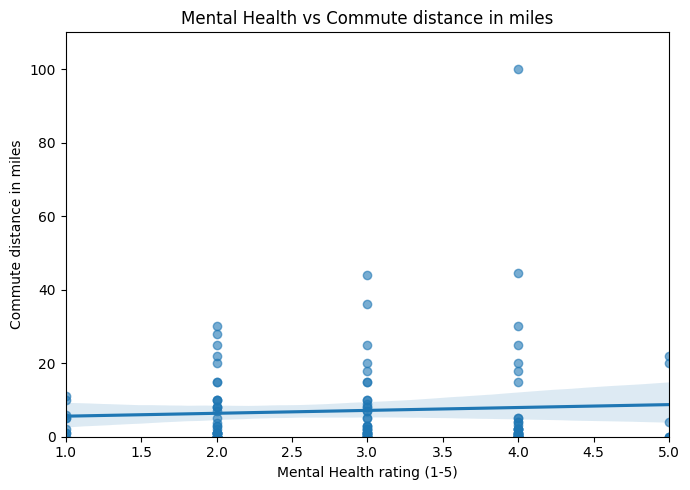

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

# ---- Load ----
responses_df = pd.read_csv("responses.csv")

# ---- Normalize headers (remove newlines / smart quotes) ----
responses_df.columns = [
    re.sub(r"\s+", " ", c.replace("“", '"').replace("”", '"').replace("’", "'")).strip()
    for c in responses_df.columns
]

# ---- Detect columns ----
# mental health column (e.g., "Rate your overall mental health.")
mental_col = [c for c in responses_df.columns if ("overall" in c.lower() and "mental" in c.lower())]
if not mental_col:
    raise KeyError("Could not find the 'overall mental health' question header.")
mental_col = mental_col[0]

# Commute distance column (allowing for slight variations of 'following')
commute_col = [
    c for c in responses_df.columns
    if ("far" in c.lower() and "commute" in c.lower() and "in miles" in c.lower())
]
if not commute_col:
    raise KeyError("Could not find the 'Commute distance (…)' activity frequency header.")
commute_col = commute_col[0]

# commute_col = [
#     c for c in responses_df.columns
#     if ("how" in c.lower() and "units" in c.lower() and "this quarter" in c.lower())
# ]
# if not commute_col:
#     raise KeyError("Could not find the 'Commute distance (…)' activity frequency header.")
# commute_col = commute_col[0]

# Commute distance column (allowing for slight variations of 'following')

print("Detected columns:\n- Mental health:", mental_col, "\n- Commute distance:", commute_col)

# ---- Clean values to numeric ----
def extract_full_number(x):
    """Extract the first full number (integer or float) from mixed responses; else NaN."""
    if pd.isna(x):
        return np.nan
    
    s = str(x).strip()
    # Regex to find the first floating-point number pattern in the string
    match = re.search(r'^-?\d*\.?\d+(?:[eE][+-]?\d+)?', s)
    
    if match:
        number_str = match.group(0)
        try:
            return float(number_str)
        except ValueError:
            return np.nan
    else:
        return np.nan

responses_df["mental_health"] = responses_df[mental_col].apply(extract_full_number)
responses_df["commute_distance"] = responses_df[commute_col].apply(extract_full_number)

# ---- Drop rows with missing values for this plot ----
plot_df = responses_df.dropna(subset=["mental_health", "commute_distance"])

# ---- Create scatter + regression line ----
plt.figure(figsize=(7, 5))
sns.regplot(
    data=plot_df,
    x="mental_health",
    y="commute_distance",
    scatter_kws={"alpha": 0.6}
)

# ---- Titles and labels ----
plt.title("Mental Health vs Commute distance in miles")
plt.xlabel("Mental Health rating (1-5)")
plt.ylabel("Commute distance in miles")

# ---- Nice bounds (Like on x is usually 1–5) ----
plt.xlim(1,5)
plt.ylim(bottom = 0, top = 110)

plt.tight_layout()
plt.show()